**QMNIST**

In [1]:
# import the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load Fashion QMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform) # load the training data
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform) # load the test data

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 72556319.58it/s]


Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 11928403.75it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 100486866.25it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 11354014.51it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


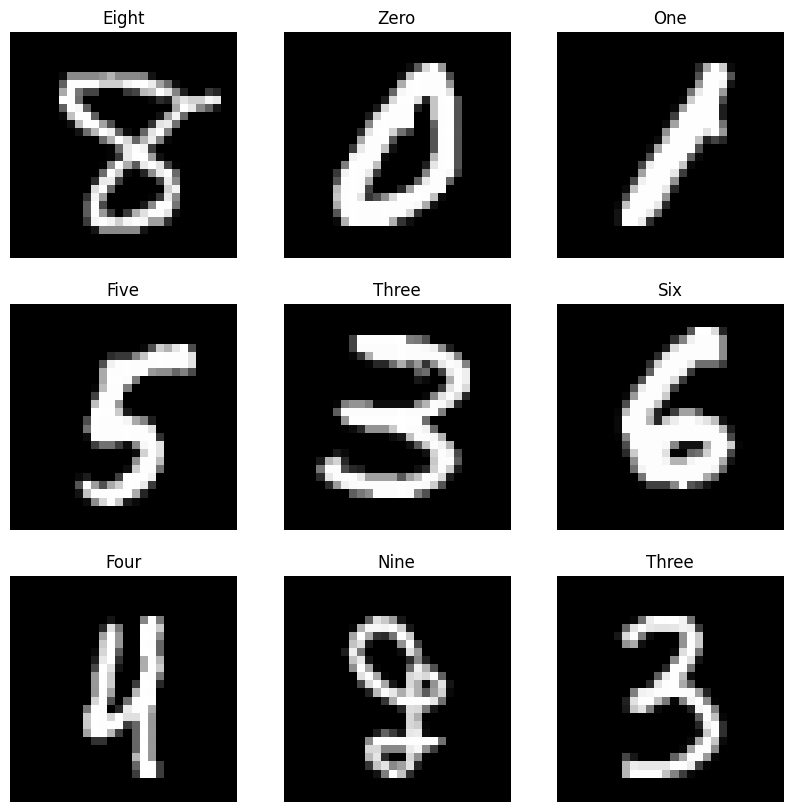

In [3]:
# labels for the data
labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "Nine",
}

# display the training data
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

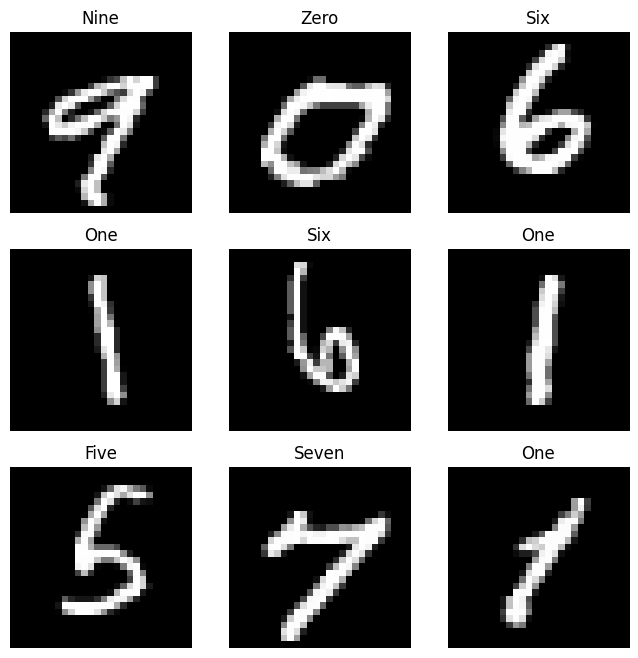

In [4]:
# display the test data
figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols * rows +1):
    sample = torch.randint(len(test_dataset), size = (1,)).item()
    img, label = test_dataset[sample]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

**Build a simple neural network**

In [5]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [6]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.059474121928215
Epoch 1, Batch 200, Loss: 0.43293350279331205
Epoch 1, Batch 300, Loss: 0.39000640615820886
Epoch 1, Batch 400, Loss: 0.35130963787436487
Epoch 1, Batch 500, Loss: 0.33830813348293304
Epoch 1, Batch 600, Loss: 0.2941129910200834
Epoch 1, Batch 700, Loss: 0.2765781215578318
Epoch 1, Batch 800, Loss: 0.25149495467543603
Epoch 1, Batch 900, Loss: 0.24565840892493726
Epoch 2, Batch 100, Loss: 0.20900701940059663
Epoch 2, Batch 200, Loss: 0.1952858066558838
Epoch 2, Batch 300, Loss: 0.20477233674377204
Epoch 2, Batch 400, Loss: 0.21655787982046604
Epoch 2, Batch 500, Loss: 0.18020891193300487
Epoch 2, Batch 600, Loss: 0.18346218891441823
Epoch 2, Batch 700, Loss: 0.18171894639730454
Epoch 2, Batch 800, Loss: 0.16664969727396964
Epoch 2, Batch 900, Loss: 0.17141372945159675
Epoch 3, Batch 100, Loss: 0.13516562921926378
Epoch 3, Batch 200, Loss: 0.13368277044966817
Epoch 3, Batch 300, Loss: 0.1476440789923072
Epoch 3, Batch 400, Loss: 0.143395522963

In [7]:
# Evaluate the model on test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total * 100}%')

Accuracy on test set: 96.53166666666667%


In [8]:
# Evaluate the model on training data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total * 100}%')

Accuracy on train set: 97.55666666666667%


In [9]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

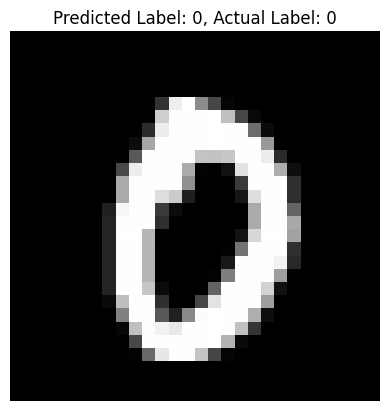

In [10]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label = predictions[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}, Actual Label: {label}')
plt.axis('off')
plt.show()


Hypothesiz Changes:


Modification 1: We add another dense layer of 128 nodes.

Effect: Adding another layer makes the network more dense. This has potential positive and negative effects. A deeper network enhances its capacity to learn complex representations. It can capture more finer details in the input data and also better represent the underlying function.

But there is risk of the network overfitting.


In [11]:
class MLP1(nn.Module):
    def __init__(self):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # New layer with 128 nodes
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model1 = MLP1()


In [12]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001, weight_decay=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1055591744184494
Epoch 1, Batch 200, Loss: 0.4554111798107624
Epoch 1, Batch 300, Loss: 0.3768625222146511
Epoch 1, Batch 400, Loss: 0.339099614918232
Epoch 1, Batch 500, Loss: 0.2907691603153944
Epoch 1, Batch 600, Loss: 0.28654904663562775
Epoch 1, Batch 700, Loss: 0.27841122016310693
Epoch 1, Batch 800, Loss: 0.2711918653547764
Epoch 1, Batch 900, Loss: 0.23074962362647056
Epoch 2, Batch 100, Loss: 0.1978413340821862
Epoch 2, Batch 200, Loss: 0.20353757448494433
Epoch 2, Batch 300, Loss: 0.1886423235014081
Epoch 2, Batch 400, Loss: 0.1751479934900999
Epoch 2, Batch 500, Loss: 0.18393206108361482
Epoch 2, Batch 600, Loss: 0.17032238252460957
Epoch 2, Batch 700, Loss: 0.18919636212289334
Epoch 2, Batch 800, Loss: 0.16783461663872004
Epoch 2, Batch 900, Loss: 0.17734327349811793
Epoch 3, Batch 100, Loss: 0.1484620236977935
Epoch 3, Batch 200, Loss: 0.15799244631081819
Epoch 3, Batch 300, Loss: 0.14530923567712306
Epoch 3, Batch 400, Loss: 0.14623862568289042

In [13]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total * 100}%')

Accuracy on test set: 95.895%


In [14]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total * 100}%')

Accuracy on train set: 96.74000000000001%


In [15]:
# Evaluate the model and store predictions
model1.eval()
predictions1 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions1.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

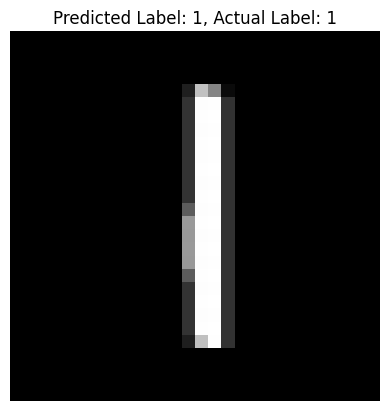

In [16]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions1[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()

Though we assumed adding another dense layer will increase the performance of the model drastically, we observed that there was no significant improvement in the performance of the model.

# **Experimentation.**

1. Model with SGD Optimizer

In [17]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [18]:
model2 = MLP()
optimizer2 = optim.SGD(model2.parameters(), lr=0.01, weight_decay=0.01)
criterion2 = nn.CrossEntropyLoss()


In [19]:
# Train the neural network
num_epochs = 7
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer2.zero_grad()
        outputs = model2(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 2.244281165599823
Epoch 1, Batch 200, Loss: 2.0568858551979066
Epoch 1, Batch 300, Loss: 1.6924651432037354
Epoch 1, Batch 400, Loss: 1.2684204578399658
Epoch 1, Batch 500, Loss: 0.947260314822197
Epoch 1, Batch 600, Loss: 0.7532345169782638
Epoch 1, Batch 700, Loss: 0.6346680644154549
Epoch 1, Batch 800, Loss: 0.5397461381554604
Epoch 1, Batch 900, Loss: 0.5266528370976448
Epoch 2, Batch 100, Loss: 0.4790920287370682
Epoch 2, Batch 200, Loss: 0.4732007747888565
Epoch 2, Batch 300, Loss: 0.4451945844292641
Epoch 2, Batch 400, Loss: 0.4162511552870274
Epoch 2, Batch 500, Loss: 0.4163705894351006
Epoch 2, Batch 600, Loss: 0.4000797832012177
Epoch 2, Batch 700, Loss: 0.3991710115969181
Epoch 2, Batch 800, Loss: 0.4042848074436188
Epoch 2, Batch 900, Loss: 0.3868946979939938
Epoch 3, Batch 100, Loss: 0.37433005005121234
Epoch 3, Batch 200, Loss: 0.38109793305397033
Epoch 3, Batch 300, Loss: 0.3706762583553791
Epoch 3, Batch 400, Loss: 0.353472214192152
Epoch 3, Ba

In [20]:
# Evaluate the model test
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total * 100}%')


# Evaluate the model train
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total * 100}%')

Accuracy on test set: 91.09833333333334%
Accuracy on train set: 91.47333333333333%


In [21]:
# Evaluate the model and store predictions
model2.eval()
predictions2 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions2.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

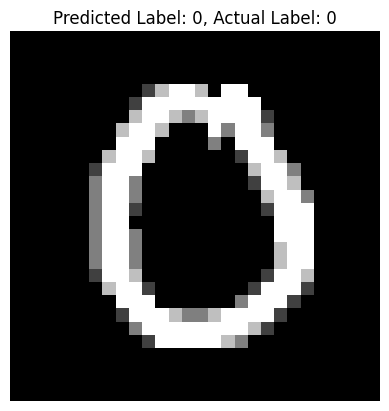

In [22]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions2[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()


1. We observe a drop in accuracy when we use SGD in Optimizer

**2. Model with RMSProp Optimizer**

In [23]:
model3 = MLP()
optimizer3 = optim.RMSprop(model3.parameters(), lr=0.001)
criterion3 = nn.CrossEntropyLoss()


In [24]:
# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer3.zero_grad()
        outputs = model3(inputs)
        loss = criterion3(outputs, labels)
        loss.backward()
        optimizer3.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0030511647462845
Epoch 1, Batch 200, Loss: 0.4657470659911633
Epoch 1, Batch 300, Loss: 0.40073780983686447
Epoch 1, Batch 400, Loss: 0.3570517203956842
Epoch 1, Batch 500, Loss: 0.31004454761743544
Epoch 1, Batch 600, Loss: 0.2983429328352213
Epoch 1, Batch 700, Loss: 0.2789150802791119
Epoch 1, Batch 800, Loss: 0.26788874201476576
Epoch 1, Batch 900, Loss: 0.2305739314109087
Epoch 2, Batch 100, Loss: 0.20252871863543986
Epoch 2, Batch 200, Loss: 0.22042874533683063
Epoch 2, Batch 300, Loss: 0.2039287183433771
Epoch 2, Batch 400, Loss: 0.18686953738331794
Epoch 2, Batch 500, Loss: 0.1998711209371686
Epoch 2, Batch 600, Loss: 0.17460724709555506
Epoch 2, Batch 700, Loss: 0.17179985970258713
Epoch 2, Batch 800, Loss: 0.16393643368035554
Epoch 2, Batch 900, Loss: 0.16767151262611152
Epoch 3, Batch 100, Loss: 0.1488129454664886
Epoch 3, Batch 200, Loss: 0.13705169696360828
Epoch 3, Batch 300, Loss: 0.13447573402896523
Epoch 3, Batch 400, Loss: 0.140752997118979

In [25]:
# Evaluate the model test
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total *100}%')


# Evaluate the model train
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total *100}%')

Accuracy on test set: 95.66833333333334%
Accuracy on train set: 96.73833333333334%


In [26]:
# Evaluate the model and store predictions
model3.eval()
predictions3 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions3.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

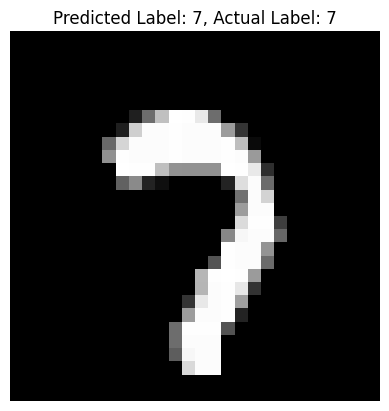

In [27]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions3[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()


There is an increase in accuracy of the test data and a slight increase in the accuracy on train data when we use RMSProp optimizer

**3. Model with Dropout**

In [28]:
# Define the neural network architecture
class MLP4(nn.Module):
    def __init__(self):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)  # Dropout layer with 20% dropout rate

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after the first hidden layer
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after the second hidden layer
        x = self.fc3(x)
        return x

# Initialize the neural network
model4 = MLP4()


In [29]:
# Define the loss function and optimizer
criterion4 = nn.CrossEntropyLoss()
optimizer4 = optim.SGD(model4.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model4.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer4.zero_grad()
        outputs = model4(inputs)
        loss = criterion4(outputs, labels)
        loss.backward()
        optimizer4.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 2.3066735577583315
Epoch 1, Batch 200, Loss: 2.2945919942855837
Epoch 1, Batch 300, Loss: 2.2850359177589414
Epoch 1, Batch 400, Loss: 2.27483829498291
Epoch 1, Batch 500, Loss: 2.2634978008270266
Epoch 1, Batch 600, Loss: 2.2508979082107543
Epoch 1, Batch 700, Loss: 2.237309167385101
Epoch 1, Batch 800, Loss: 2.2269885206222533
Epoch 1, Batch 900, Loss: 2.214768388271332
Epoch 2, Batch 100, Loss: 2.1881572723388674
Epoch 2, Batch 200, Loss: 2.1705094265937803
Epoch 2, Batch 300, Loss: 2.1561023211479187
Epoch 2, Batch 400, Loss: 2.1340034914016726
Epoch 2, Batch 500, Loss: 2.1112449288368227
Epoch 2, Batch 600, Loss: 2.0939733672142027
Epoch 2, Batch 700, Loss: 2.061858263015747
Epoch 2, Batch 800, Loss: 2.03301726937294
Epoch 2, Batch 900, Loss: 2.009990894794464
Epoch 3, Batch 100, Loss: 1.958755373954773
Epoch 3, Batch 200, Loss: 1.927768396139145
Epoch 3, Batch 300, Loss: 1.8911981534957887
Epoch 3, Batch 400, Loss: 1.8453304362297058
Epoch 3, Batch 500, 

In [30]:
# Evaluate the model test
model4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total *100}%')


# Evaluate the model train
model4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total *100}%')

Accuracy on test set: 80.80333333333334%
Accuracy on train set: 80.82833333333333%


In [31]:
# Evaluate the model and store predictions
model4.eval()
predictions4 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions4.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

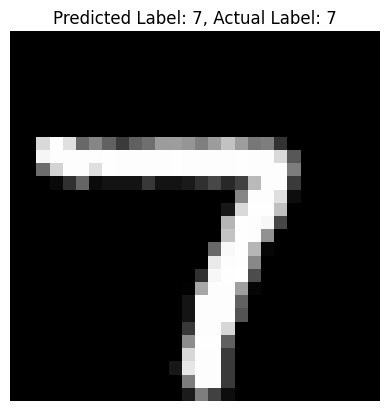

In [32]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions4[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()


**4. We increase the number of nodes, use dropout and LeakyRelu**

In [33]:
import torch.nn.functional as F

class MLP5(nn.Module):
    def __init__(self):
        super(MLP5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)  # Add dropout layer with 20% dropout rate

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01)  # LeakyReLU activation
        x = self.dropout(x)  # Apply dropout
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc3(x), negative_slope=0.01)
        x = self.fc4(x)
        return x

# Initialize the neural network
model5 = MLP5()


criterion5 = nn.CrossEntropyLoss()

# Initialize the optimizer (Adam)
optimizer5 = optim.Adam(model5.parameters(), lr=0.01)

In [34]:
# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model5.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer5.zero_grad()
        outputs = model5(inputs)
        loss = criterion5(outputs, labels)
        loss.backward()
        optimizer5.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1721206521987915
Epoch 1, Batch 200, Loss: 0.60230428814888
Epoch 1, Batch 300, Loss: 0.5059666596353054
Epoch 1, Batch 400, Loss: 0.49213611736893653
Epoch 1, Batch 500, Loss: 0.4669164103269577
Epoch 1, Batch 600, Loss: 0.43216299831867216
Epoch 1, Batch 700, Loss: 0.41238064229488375
Epoch 1, Batch 800, Loss: 0.4263108290731907
Epoch 1, Batch 900, Loss: 0.43892010644078255
Epoch 2, Batch 100, Loss: 0.4494011063873768
Epoch 2, Batch 200, Loss: 0.40394859954714774
Epoch 2, Batch 300, Loss: 0.38361657425761225
Epoch 2, Batch 400, Loss: 0.3603849769383669
Epoch 2, Batch 500, Loss: 0.3911179107427597
Epoch 2, Batch 600, Loss: 0.38296796917915343
Epoch 2, Batch 700, Loss: 0.3542861558496952
Epoch 2, Batch 800, Loss: 0.3570826597511768
Epoch 2, Batch 900, Loss: 0.37474393352866175
Epoch 3, Batch 100, Loss: 0.3769020116329193
Epoch 3, Batch 200, Loss: 0.34281334713101386
Epoch 3, Batch 300, Loss: 0.34482656031847
Epoch 3, Batch 400, Loss: 0.34084878250956535
Epoc

In [35]:
# Evaluate the model test
model5.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total*100}%')


# Evaluate the model train
model5.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total*100}%')

Accuracy on test set: 94.37333333333333%
Accuracy on train set: 95.06333333333333%


In [36]:
# Evaluate the model and store predictions
model5.eval()
predictions5 = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions5.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

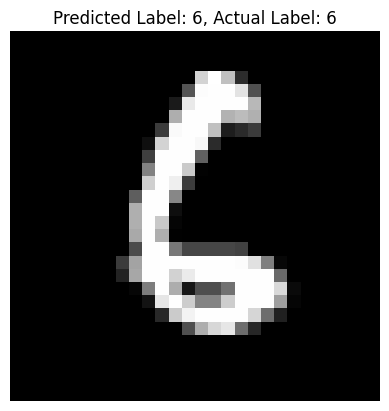

In [37]:
import random
import matplotlib.pyplot as plt

# Get a random index for the test data
random_index = random.randint(0, len(test_dataset) - 1)

# Get the image and label at the random index
image, label = test_dataset[random_index]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Assuming 'predictions' contains the predicted labels for the test data
predicted_label1 = predictions5[random_index]

# Display the image with both predicted and actual labels
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted_label1}, Actual Label: {label}')
plt.axis('off')
plt.show()


There are many combinations to experiment with amongst different optimizers, loss functions, dropout, and activation functions. So far we observed that there has been no drastic improvement in the performance of the network.

The original neural network configuration without the additional dense layer performed slightly better on the test data compared to the modified version with an extra layer and SGD optimizer model.

This suggests that while the additional layer increased the model's capacity to learn complex representations, it did not necessarily translate to improved performance on the test data,

GitHub link:
https://github.com/AV-D/Deep-learning-Experiments/tree/main

References:

1. https://theneuralblog.com/forward-pass-backpropagation-example/
2. Tutorial of Data_255